In [78]:
import pandas as pd
from plotnine import *
import random
import numpy as np
import plotly.express as px

In [124]:
df = pd.read_csv('data/preprocessed_data.csv')
df['Age'] = df['�..Age']
df = df.drop('�..Age', axis = 1)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,...,Low,0,8,0,Bad,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,...,Very High,1,10,3,Better,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,...,Medium,0,7,3,Better,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,...,High,0,8,3,Better,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,...,Very High,1,6,3,Better,2,2,2,2,No


In [91]:
atts = ['Age',
'DailyRate',
'DistanceFromHome',
'HourlyRate',
'MonthlyIncome',
'MonthlyRate',
'NumCompaniesWorked',
'PercentSalaryHike',
'TotalWorkingYears',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion',
'YearsWithCurrManager']

In [92]:
px.box(df, x = 'MonthlyIncome')

In [93]:
def iqr_outliers(df, att):
    out = 0
    m = np.mean(df[att])
    q1 = df[att].quantile(0.25)
    q3 = df[att].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df[att]:
        if i > Upper_tail or i < Lower_tail:
            out += 1
            df[att] = df[att].replace(i, m)

In [94]:
sums = set()
for att in atts:
    df_copy = df.copy()
    fig = px.box(df_copy, x = att)
    fig.update_layout(autosize=False, width=400, height=300)
    fig.show()
    iqr_outliers(df_copy, att)
    fig = px.box(df_copy, x = att)
    fig.update_layout(autosize=False, width=400, height=300)
    fig.show()
    #drop_outliers(df, att)
#     s = set(iqr_outliers(df[att]))
#     sums.update(s)

In [84]:
df = df.drop(list(sums))
df.shape

(1470, 31)

In [97]:
import plotly.graph_objects as go

In [125]:
atts = ['DistanceFromHome',
'NumCompaniesWorked',
'PercentSalaryHike',
'TotalWorkingYears',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion',
'YearsWithCurrManager']

In [126]:
colors = ['#af8dc3', '#7fbf7b','#af8dc3', '#7fbf7b', '#af8dc3', '#7fbf7b','#af8dc3', '#7fbf7b']
names = ['Distance From Home',
'Num Companies Worked',
'Percent Salary Hike',
'Total Working Years',
'Years At Company',
'Years In Current Role',
'Years Since Last Promotion',
'Years With Curr Manager']

In [127]:
fig = go.Figure()
for i in range(len(atts)): 
    fig.add_trace(go.Box(
        x=df[atts[i]],
        name=names[i],
        marker_color=colors[i]
    ))
fig.update_layout(
    xaxis=dict(title='normalized moisture', zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False
)
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

In [129]:
for att in atts:
    iqr_outliers(df, att)

In [130]:
fig = go.Figure()
for i in range(len(atts)): 
    fig.add_trace(go.Box(
        x=df[atts[i]],
        name=names[i],
        marker_color=colors[i]
    ))
fig.update_layout(
    xaxis=dict(title='normalized moisture', zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False
)
fig.update_traces(orientation='h') # horizontal box plots
fig.show()

In [132]:
df.shape

(1470, 31)

In [85]:
px.box(df, x = 'MonthlyIncome')

In [184]:
df['MonthlyIncome2'] = df.MonthlyIncome
df.drop('MonthlyIncome', axis = 1, inplace = True)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,MonthlyIncome2
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5,Yes,5993
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7,No,5130
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0,Yes,2090
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0,No,2909
5,32,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very High,Male,79,High,1,Laboratory Technician,Very High,Single,11864,0,No,13,Excellent,High,0,8,2,Good,7,7,3,6,No,3068


In [12]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

In [186]:
def f(x):
    if x < 2500:
        return 'Small'
    elif x < 4000:
        return 'Medium'
    elif x < 5500:
        return 'High'
    elif x < 9000:
        return 'IT'
    else:
        return 'RichOne'

In [188]:
df['disc'] = df['MonthlyIncome2'].apply(lambda x: f(x))
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,MonthlyIncome2,disc
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5,Yes,5993,IT
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7,No,5130,High
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0,Yes,2090,Small
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0,No,2909,Medium
5,32,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very High,Male,79,High,1,Laboratory Technician,Very High,Single,11864,0,No,13,Excellent,High,0,8,2,Good,7,7,3,6,No,3068,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3,No,2571,Medium
1466,39,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7,No,9991,RichOne
1467,27,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3,No,6142,IT
1468,49,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8,No,5390,High


In [189]:
df.to_csv("dfdfdf4.csv", index = False)


In [177]:
df.shape
sums = set()
for att in atts:
    print(att)
    #sns.boxplot(df[att])
    drop_outliers(df, att)
    #sns.boxplot(df[att])
    print(df.shape)

Age
(1470, 31)
DailyRate
(1470, 31)
DistanceFromHome
(1470, 31)
HourlyRate
(1470, 31)
MonthlyIncome
(1356, 31)
MonthlyRate
(1356, 31)
NumCompaniesWorked
(1309, 31)
PercentSalaryHike
(1309, 31)
TotalWorkingYears
(1251, 31)
YearsAtCompany
(1224, 31)
YearsInCurrentRole
(1221, 31)
YearsSinceLastPromotion
(1086, 31)
YearsWithCurrManager
(1070, 31)


In [178]:
df.to_csv("dfdfdf2.csv", index = False)

In [113]:
# indexNames = df[(df['Attrition'] == 'No')]
# drop_indices = np.random.choice(indexNames.index, 900, replace=False)
# df_copy = df.drop(drop_indices)
# df_copy['Attrition'].describe()

In [114]:
pd.set_option("display.max_column", 35)

In [115]:
df_copy.

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Age
0,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5,1,41
2,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0,1,37
4,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2,0,27
6,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,High,Female,81,Very High,1,Laboratory Technician,Low,Married,2670,9964,4,Yes,20,Outstanding,Low,3,12,3,Good,1,0,0,0,0,59
9,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,High,Male,94,High,2,Healthcare Representative,High,Married,5237,16577,6,No,13,Excellent,Medium,2,17,3,Good,7,7,7,7,0,36


In [127]:
age_label = ["~19", "20~24", "25~29", "30~34", "35~39", "40~44", "45~49", "50~54", "55~59"]
age_cate = pd.cut(x=dataframe['Age'], bins=[18, 20, 25, 30, 35, 40, 45, 50, 55, 60], labels=age_label)
dataframe['age_cate'] = age_cate
age_frame = dataframe['age_cate'].value_counts().to_frame().sort_index()
age_frame.index.name = "age"
age_frame["num"] = age_frame["age_cate"]
del age_frame["age_cate"]
age_frame

NameError: name 'dataframe' is not defined

In [124]:
df_copy["AvgWorkingYears"] = df_copy["TotalWorkingYears"]/df_copy["NumCompaniesWorked"]
df_copy.loc[df_copy["NumCompaniesWorked"] == 0, "AvgWorkingYears"] = None

C:\Users\Krul\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 66 rows containing missing values.


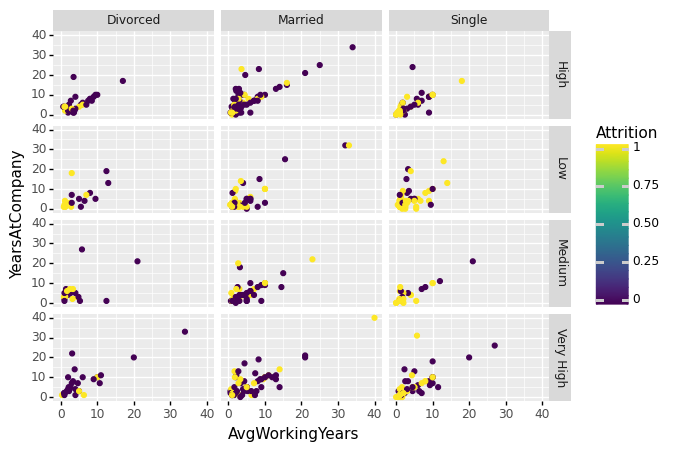

<ggplot: (-9223371947989254298)>

In [128]:
ggplot(df_copy, aes(x='AvgWorkingYears', y = 'YearsAtCompany', color = 'Attrition')) + geom_point() + facet_grid('EnvironmentSatisfaction~MaritalStatus')

In [133]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [137]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

<AxesSubplot:>

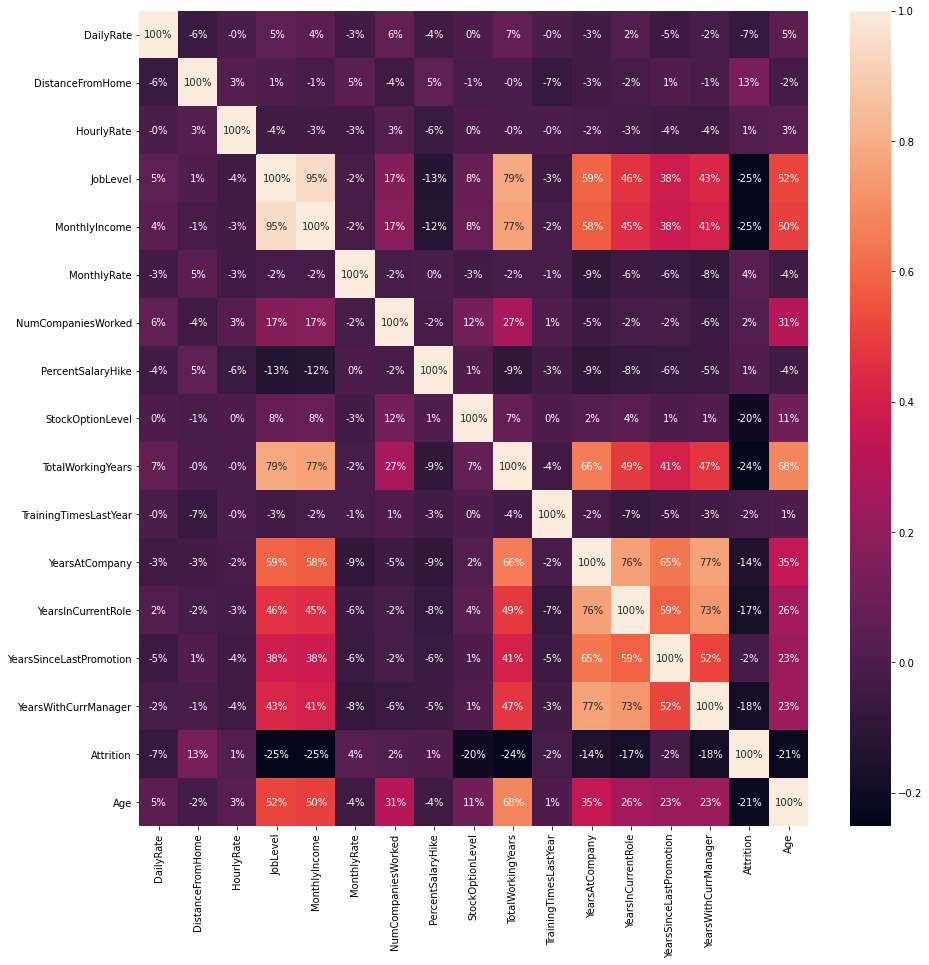

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df_copy.corr(),annot=True,fmt='.0%')

In [144]:
import plotly.offline as py
df[numerical]

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,2,5993,19479,8.000000,11,Excellent,0,8.0,0,Bad,6.0,4.0,0.0,5.0
1,49,279,8,61,2,5130,24907,1.000000,23,Outstanding,1,10.0,3,Better,10.0,7.0,1.0,7.0
2,37,1373,2,92,1,2090,2396,6.000000,15,Excellent,0,7.0,3,Better,0.0,0.0,0.0,0.0
3,33,1392,3,56,1,2909,23159,1.000000,11,Excellent,0,8.0,3,Better,8.0,7.0,3.0,0.0
4,27,591,2,40,1,3468,16632,2.693197,12,Excellent,1,6.0,3,Better,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2,2571,12290,4.000000,17,Excellent,1,17.0,3,Better,5.0,2.0,0.0,3.0
1466,39,613,6,42,3,9991,21457,4.000000,15,Excellent,1,9.0,5,Better,7.0,7.0,1.0,7.0
1467,27,155,4,87,2,6142,5174,1.000000,20,Outstanding,1,6.0,0,Better,6.0,2.0,0.0,3.0
1468,49,1023,2,63,2,5390,13243,2.000000,14,Excellent,0,17.0,3,Good,9.0,6.0,0.0,8.0


In [146]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome',
             u'HourlyRate', u'JobLevel',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager', u'Attrition']
data = [
    go.Heatmap(
        z=df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
    )
]
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [50]:
data['Attrition'] = data['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [57]:
data['Education'] = data['Education'].apply(lambda)

count         1470
unique           5
top       Bachelor
freq           572
Name: Education, dtype: object

In [44]:
cor = data.corr()
cor

,�..Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
�..Age,1.000000,0.010661,-0.001686,0.024287,0.509604,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.002966,0.007707,-0.032182,0.038153,0.022704,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,0.005303,-0.017014,0.027473,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406,0.077924
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.027853,-0.015794,-0.015297,0.022157,-0.009062,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobLevel,0.509604,0.002966,0.005303,-0.027853,1.000000,0.950300,0.039563,0.142501,-0.034730,0.013984,0.782208,-0.018191,0.534739,0.389447,0.353885,0.375281,-0.169105
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,0.950300,1.000000,0.034814,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079,-0.159840
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.039563,0.034814,1.000000,0.017521,-0.006429,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746,0.015170
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.142501,0.149515,0.017521,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319,0.043494
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.034730,-0.027269,-0.006429,-0.010238,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985,-0.013478
StockOptionLevel,0.037510,0.042143,0.044872,0.050263,0.013984,0.005408,-0.034323,0.030075,0.007528,1.000000,0.010136,0.011274,0.015058,0.050818,0.014352,0.024698,-0.137145


In [45]:
cor["Attrition"]

�..Age                    -0.159205
DailyRate                 -0.056652
DistanceFromHome           0.077924
HourlyRate                -0.006846
JobLevel                  -0.169105
MonthlyIncome             -0.159840
MonthlyRate                0.015170
NumCompaniesWorked         0.043494
PercentSalaryHike         -0.013478
StockOptionLevel          -0.137145
TotalWorkingYears         -0.171063
TrainingTimesLastYear     -0.059478
YearsAtCompany            -0.134392
YearsInCurrentRole        -0.160545
YearsSinceLastPromotion   -0.033019
YearsWithCurrManager      -0.156199
Attrition                  1.000000
Name: Attrition, dtype: float64

In [48]:
set(data.columns) - set(cor.columns)

{'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance'}